<a href="https://colab.research.google.com/github/Coreight98/Paran_ajou_Project_Anything/blob/main/pattern_classify_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import time

In [20]:
train_location = './drive/MyDrive/data/DTD/'
test_location = './drive/MyDrive/data/DTD_test/'

X = np.empty((0, 4), dtype=int)
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        self.layer1_1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 64, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU())
        # 두번째층
        self.layer1_2 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 64, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # 세번째층
        self.layer2_1 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU())
        
        # 네번째층
        self.layer2_2 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 128, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # 다섯번째층
        self.layer3_1 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU())
        
        # 다섯번째층
        self.layer3_2 = torch.nn.Sequential(
            torch.nn.Conv2d(256, 256, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU())
        
        self.layer3_3 = torch.nn.Sequential(
            torch.nn.Conv2d(256, 256, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer4_1 = torch.nn.Sequential(
            torch.nn.Conv2d(256, 512, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU())
        
        self.layer4_2 = torch.nn.Sequential(
            torch.nn.Conv2d(512, 512, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU())
        
        self.layer4_3 = torch.nn.Sequential(
            torch.nn.Conv2d(512, 512, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer5_1 = torch.nn.Sequential(
            torch.nn.Conv2d(512, 512, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU())
        
        self.layer5_2 = torch.nn.Sequential(
            torch.nn.Conv2d(512, 512, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU())
        
        self.layer5_3 = torch.nn.Sequential(
            torch.nn.Conv2d(512, 512, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
       
        # 전결합층 
        self.fc = torch.nn.Linear(25088, 38, bias=True)
        self.fc2 = torch.nn.Linear(4096, 4096, bias=True)
        self.fc3 = torch.nn.Linear(4096, 38, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)
        # torch.nn.init.xavier_uniform_(self.fc2.weight)
        # torch.nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        # global X
        out = self.layer1_1(x)
        out = self.layer1_2(out)
        out = self.layer2_1(out)
        out = self.layer2_2(out)
        out = self.layer3_1(out)
        out = self.layer3_2(out)
        out = self.layer3_3(out)
        out = self.layer4_1(out)
        out = self.layer4_2(out)
        out = self.layer4_3(out)
        out = self.layer5_1(out)
        out = self.layer5_2(out)
        out = self.layer5_3(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        out = self.fc2(out)
        out = self.fc3(out)
        # X = np.append(X,out.detach().numpy())
        return out

# class CNN(torch.nn.Module):

#     def __init__(self):
#         super(CNN, self).__init__()
#         # 첫번째층
#         self.layer1 = torch.nn.Sequential(
#             torch.nn.Conv2d(3, 32, kernel_size=3,stride=1, padding=1),
#             # torch.nn.BatchNorm2d(num_features=32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
#             # torch.nn.BatchNorm2d(num_features=64),
#             torch.nn.ReLU(),
#             torch.nn.MaxPool2d(kernel_size=4, stride=4))

#         # 두번째층
#         self.layer2 = torch.nn.Sequential(
#             torch.nn.Conv2d(32, 64, kernel_size=3,stride=1, padding=1),
#             # torch.nn.BatchNorm2d(num_features=256),
#             torch.nn.ReLU(),
#             torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
#         # 세번째층
#         self.layer3 = torch.nn.Sequential(
#             torch.nn.Conv2d(64, 128, kernel_size=3,stride=1, padding=1),
#             # torch.nn.BatchNorm2d(num_features=512),
#             torch.nn.ReLU(),
#             torch.nn.AvgPool2d(kernel_size=2, stride=2))
        
#         # 네번째층
#         self.layer4 = torch.nn.Sequential(
#             torch.nn.Conv2d(128, 256, kernel_size=3,stride=1, padding=1),
#             # torch.nn.BatchNorm2d(num_features=1024),
#             torch.nn.ReLU(),
#             torch.nn.AvgPool2d(kernel_size=2, stride=2))
        
#         # 다섯번째층
#         self.layer5 = torch.nn.Sequential(
#             torch.nn.Conv2d(256, 512, kernel_size=3,stride=1, padding=1),
#             # torch.nn.BatchNorm2d(num_features=2048),
#             torch.nn.ReLU(),
#             torch.nn.AvgPool2d(kernel_size=2, stride=2))
        
#         # 다섯번째층
#         self.layer6 = torch.nn.Sequential(
#             torch.nn.Conv2d(512, 1024, kernel_size=3,stride=1, padding=1),
#             # torch.nn.BatchNorm2d(num_features=4096),
#             torch.nn.ReLU(),
#             torch.nn.AvgPool2d(kernel_size=2, stride=2))

#         # # 6번째층
#         # self.layer8 = torch.nn.Sequential(
#         #     torch.nn.Conv2d(1024, 2048, kernel_size=3,stride=1, padding=1),
#         #     torch.nn.BatchNorm2d(num_features=2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
#         #     torch.nn.ReLU(),
#         #     torch.nn.AvgPool2d(kernel_size=2, stride=2))
       
        
#         # 전결합층 
#         self.fc = torch.nn.Linear(1024, 38, bias=True)

#         # 전결합층 한정으로 가중치 초기화
#         torch.nn.init.xavier_uniform_(self.fc.weight)

#     def forward(self, x):
#         # global X
#         out = self.layer1(x)
#         # print(out.shape)
#         out = self.layer2(out)
#         # print(out.shape)
#         out = self.layer3(out)
#         # print(out.shape)
#         out = self.layer4(out)
#         # print(out.shape)
#         out = self.layer5(out)
#         # print(out.shape)
#         out = self.layer6(out)
#         # print(out.shape)
#         out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
#         out = self.fc(out)
#         # X = np.append(X,out.detach().numpy())
#         return out

class PatternDataset():
    def __init__(self, image, class_to_int, mode, transforms):
        super().__init__()
        self.image = image
        self.class_to_int = class_to_int
        self.mode = mode
        self.transforms = transforms

    def __getitem__(self, index):

        if self.mode == 'train' :
            image_name = self.image[index]
            image = Image.open(train_location + image_name)
            image = image.resize((224,224))
            #레이블 입력
            label = self.class_to_int[image_name.split('_')[0]]
            label = torch.tensor(label,dtype=torch.long)
            #이미지 변형 적용
            image = self.transforms(image)
            return image, label
        elif self.mode == 'test':
            image_name = self.image[index]
            image = Image.open(test_location + image_name)
            image = image.resize((224,224))
            #레이블 입력
            label = self.class_to_int[image_name.split('_')[0]]
            label = torch.tensor(label,dtype=torch.long)
            #이미지 변형 적용용
            image = self.transforms(image)
            return image, label

    def __len__(self):
        return len(self.image)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [21]:
def train(trainloader, net, criterion, optimizer):
  running_loss = 0.0
  for i, data in enumerate(trainloader,0):
      inputs, labels = data  # data입력
      optimizer.zero_grad()  # gradient 매개변수를 0으로 만듬
      # 순전파 + 역전파 + 최적화
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      # 통계출력
      running_loss += loss.item()
      if i % 200 == 199:
          print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
          running_loss = 0.0

def test(testloader, net):
  # 전체 데이터 셋에 대한 결과 확인
  net.eval()
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  print('Accuracy of the network on the 380 test images: %d %%' % (100*correct/total))

In [23]:
if __name__ == '__main__':
    # 데이터 셋 불러오고 정규화
    transform = transforms.Compose(
        # [transforms.Grayscale(num_output_channels=1),
         [transforms.ToTensor(),
          transforms.Normalize((0.5),(0.5))
          ]
    )

    train_images = os.listdir(train_location)
    test_images = os.listdir(test_location)
    print("--Train Images--")
    print("Num of All Images: ", len(train_images))
    print("--Test Images--")
    print("Num of All Images: ", len(test_images))


    class_to_int = {'banded':0, 'blotchy':1, 'braided':2, 'bubbly':3, 'bumpy':4, 'chequered':5, 'cobwebbed':6, 'cracked':7, 'crosshatched':8, 'crystalline':9,
            'dotted':10, 'fibrous':11, 'flecked':12, 'frilly':13, 'gauzy':14, 'grooved':15, 'honeycombed':16, 'interlaced':17, 'knitted':18, 'lacelike':19, 'lined':20, 'marbled':21, 'meshed':22,
            'paisley':23, 'perforated':24, 'pleated':25, 'porous':26, 'scaly':27, 'smeared':28, 'sprinkled':29, 'stratified':30, 'striped':31, 'studded':32,
            'swirly':33, 'veined':34, 'woven':35, 'wrinkled':36, 'zigzagged':37}
    classes = ['banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered', 'cobwebbed', 'cracked', 'crosshatched', 'crystalline',
            'dotted', 'fibrous', 'flecked', 'frilly', 'gauzy', 'grooved', 'honeycombed', 'interlaced', 'knitted', 'lacelike', 'lined', 'marbled', 'meshed',
            'paisley', 'perforated', 'pleated', 'porous', 'scaly', 'smeared', 'sprinkled', 'stratified', 'striped', 'studded',
            'swirly', 'veined', 'woven', 'wrinkled', 'zigzagged']

    # 데이터 셋 생성
    train_dataset = PatternDataset(train_images, class_to_int, mode='train', transforms=transform)
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)

    test_dataset = PatternDataset(test_images, class_to_int, mode='test', transforms=transform)
    testloader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=0)

    ## 로드할때 여기부터 test전까지 주석처리 ( PATH 정의 빼고)
    net = CNN()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    device = 'cuda'
    # # device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print (device,"로 학습")


    # 신경망 학습하기
    for epoch in range(10):
        train(trainloader, net, criterion, optimizer)
        test(testloader, net)
        PATH = './drive/MyDrive/data/DTD_save/YG/net3_%d.pth'%(epoch+1)
        torch.save(net, PATH)   
    print('Finished Training')


--Train Images--
Num of All Images:  4180
--Test Images--
Num of All Images:  380
cuda 로 학습
[1,   200] loss: 0.364
[1,   400] loss: 0.364
[1,   600] loss: 0.364
[1,   800] loss: 0.364
[1,  1000] loss: 0.364
Accuracy of the network on the 380 test images: 2 %
[2,   200] loss: 0.364


KeyboardInterrupt: ignored

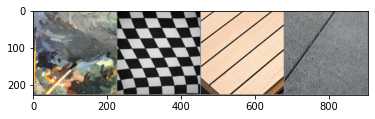

GroundTruth:  smeared chequered grooved porous
Pridicted:  crystalline chequered lined porous
Accuracy of the network on the 380 test images: 41 %


In [ ]:
test_dataset = PatternDataset(test_images, class_to_int, mode='test', transforms=transform)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=0)

dataiter = iter(testloader)
images, labels = dataiter.next()

#이미지 출력
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


# net.load_state_dict(torch.load(PATH))
#로드할때 윗줄 주석처리하고 밑 두줄 주석제거
# net = torch.load(PATH)
# net.eval()
outputs = net(images)

_, predicted =torch.max(outputs, 1)
print('Pridicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))
# 전체 데이터 셋에 대한 결과 확인
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 380 test images: %d %%' % (100*correct/total))